## Importing libraries

In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## data preprocessing 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from statsmodels.tsa.arima.model import ARIMA


In [3]:
onlineRetail = pd.read_csv('online_retail.csv')
onlineRetail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
onlineRetail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
onlineRetail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
onlineRetail.duplicated().sum()

5268

In [7]:
onlineRetail = onlineRetail.dropna(subset=['CustomerID'])
onlineRetail.drop_duplicates(inplace=True)
onlineRetail

C:\Users\salem\AppData\Local\Temp\ipykernel_298772\662176018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail.drop_duplicates(inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
onlineRetail.InvoiceDate

0          12/1/2010 8:26
1          12/1/2010 8:26
2          12/1/2010 8:26
3          12/1/2010 8:26
4          12/1/2010 8:26
               ...       
541904    12/9/2011 12:50
541905    12/9/2011 12:50
541906    12/9/2011 12:50
541907    12/9/2011 12:50
541908    12/9/2011 12:50
Name: InvoiceDate, Length: 401604, dtype: object

In [9]:
onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])
onlineRetail.head()

C:\Users\salem\AppData\Local\Temp\ipykernel_298772\2682317610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
onlineRetail.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [11]:
onlineRetail['TotalSales'] = onlineRetail['Quantity'] * onlineRetail['UnitPrice']
onlineRetail

C:\Users\salem\AppData\Local\Temp\ipykernel_298772\2771243973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['TotalSales'] = onlineRetail['Quantity'] * onlineRetail['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [12]:
onlineRetail['Month'] = onlineRetail['InvoiceDate'].dt.month_name()
onlineRetail['DayOfWeek'] = onlineRetail['InvoiceDate'].dt.day_name()
onlineRetail['YearMonth'] = onlineRetail['InvoiceDate'].dt.strftime('%Y-%m')
onlineRetail

C:\Users\salem\AppData\Local\Temp\ipykernel_298772\4228626569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['Month'] = onlineRetail['InvoiceDate'].dt.month_name()
C:\Users\salem\AppData\Local\Temp\ipykernel_298772\4228626569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['DayOfWeek'] = onlineRetail['InvoiceDate'].dt.day_name()
C:\Users\salem\AppData\Local\Temp\ipykernel_298772\4228626569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Month,DayOfWeek,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,December,Wednesday,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,December,Wednesday,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,December,Wednesday,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,December,Friday,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,December,Friday,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,Friday,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,December,Friday,2011-12


In [13]:
# Calculate Total Quantity sold per month for all months up to and including November 2011
monthly_TotalQuantity = onlineRetail.loc[0:516382].groupby('YearMonth')['Quantity'].sum()
monthly_TotalQuantity


YearMonth
2010-12    295177
2011-01    268755
2011-02    262243
2011-03    343095
2011-04    277730
2011-05    367115
2011-06    356239
2011-07    361359
2011-08    385865
2011-09    536350
2011-10    568898
2011-11    666816
Name: Quantity, dtype: int64

## 1. Total Price Trends Analysis


In [14]:
monthly_TotalQuantity.index = pd.to_datetime(monthly_TotalQuantity.index)
monthly_TotalQuantity

YearMonth
2010-12-01    295177
2011-01-01    268755
2011-02-01    262243
2011-03-01    343095
2011-04-01    277730
2011-05-01    367115
2011-06-01    356239
2011-07-01    361359
2011-08-01    385865
2011-09-01    536350
2011-10-01    568898
2011-11-01    666816
Name: Quantity, dtype: int64

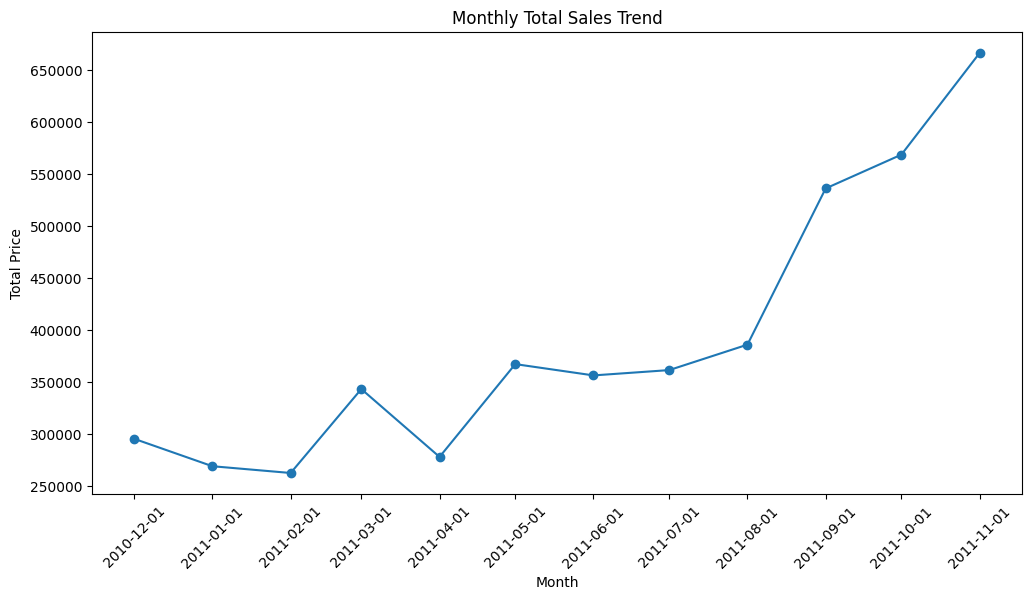

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_TotalQuantity.index, monthly_TotalQuantity.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Monthly Total Sales Trend')
plt.xticks(monthly_TotalQuantity.index, rotation=45)  # Set x-ticks to all dates and rotate for better readability
plt.show()

## Decomposition

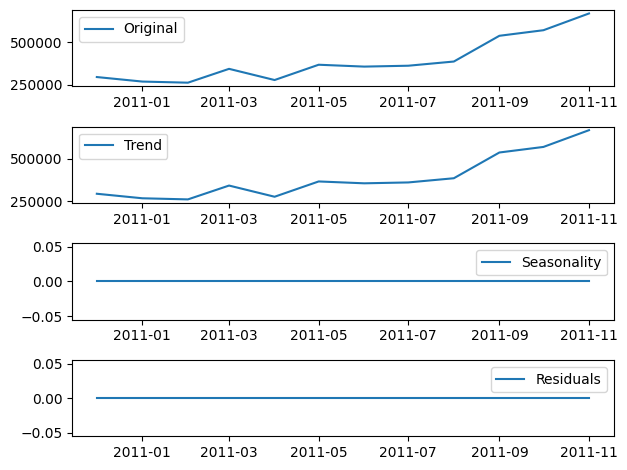

In [16]:

decomposition = seasonal_decompose(monthly_TotalQuantity,period=1,model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(monthly_TotalQuantity, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

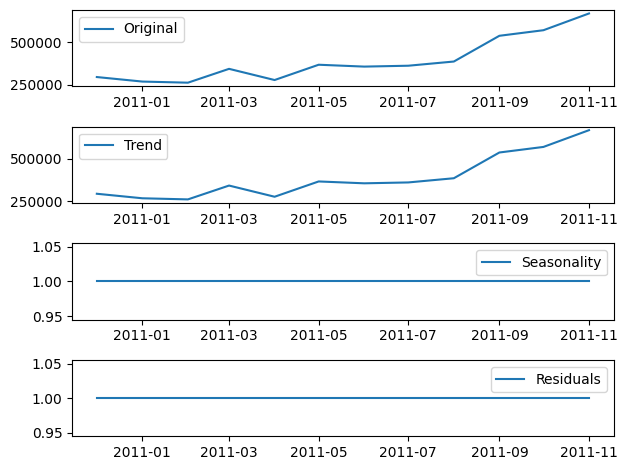

In [17]:

decomposition = seasonal_decompose(monthly_TotalQuantity,period=1,model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(monthly_TotalQuantity, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

This decomposition suggests that the time series is only driven by its trend component, with little to no seasonal influence and minimal unexplained variation (residuals). The most notable feature is the strong upward trend in the latter part of the year.

## why it doesnt have seasonal influence and variation ( residuals ) 
- The period shown (11 months) may be too short to detect seasonal patterns.

## Quantity Analysis

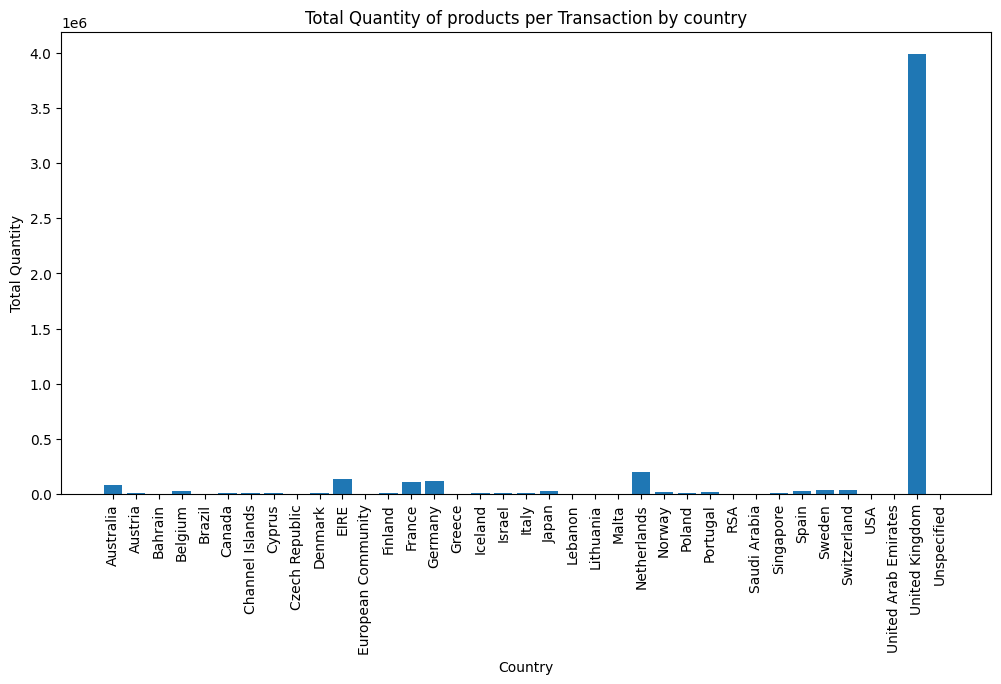

In [29]:
# the following code shows the total quantity of products per transaction by countries
sales_by_country = onlineRetail.groupby('Country')['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(sales_by_country['Country'], sales_by_country['Quantity'])
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Total Quantity of products per Transaction by country')
plt.xticks(rotation=90)
plt.show()


## 2.Customer Segmentation

#Recency (R): How recently a customer has made a purchase (calculated as the difference between the last purchase date and the current date).

#Frequency (F): How often a customer makes a purchase (count of purchases).

#Monetary (M): How much money a customer spends (total sum of money spent).

In [20]:

# Compute RFM metrics
# Recency: Calculate the number of days since the last transaction
max_date = onlineRetail['InvoiceDate'].max()
onlineRetail['Recency'] = (max_date - onlineRetail['InvoiceDate']).dt.days

# Frequency: Count the number of unique invoices for each customer
rfm = onlineRetail.groupby('CustomerID').agg({
    'Recency': 'min',   # minimum days since last purchase
    'InvoiceNo': 'nunique',  # count of unique invoices
    'TotalSales': 'sum'  # sum of total purchases
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Standardize the RFM variables
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert scaled array back to DataFrame
rfm_scaled = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Show the first few rows of the RFM DataFrame
print(rfm.head(10))


   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40
5     12352.0       35         11   1545.41
6     12353.0      203          1     89.00
7     12354.0      231          1   1079.40
8     12355.0      213          1    459.40
9     12356.0       22          3   2811.43


C:\Users\salem\AppData\Local\Temp\ipykernel_298772\668755388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['Recency'] = (max_date - onlineRetail['InvoiceDate']).dt.days


## Analyzing the clusters by showing the mean values of Recency, Frequency, and Monetary, along with the count of customers in each cluster.

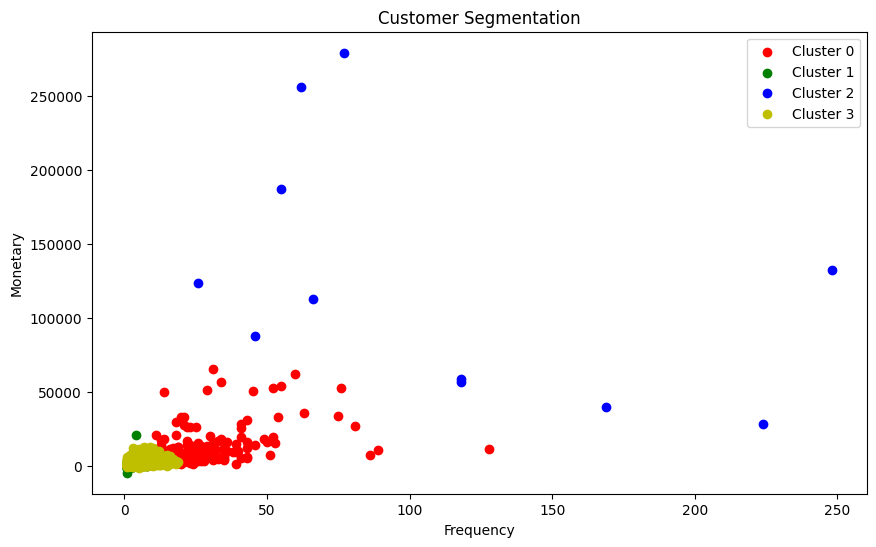

            Recency   Frequency       Monetary  CustomerID
Cluster                                                   
0          9.787565   28.575130   12190.961710         193
1        247.927577    1.805942     453.425572        1077
2          4.090909  109.909091  124150.432727          11
3         41.768360    4.374313    1317.266164        3091


In [21]:
# K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster_data = rfm[rfm['Cluster'] == i]
    plt.scatter(cluster_data['Frequency'], cluster_data['Monetary'], c=colors[i], label=f'Cluster {i}')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

# Show the clusters
print(rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}))


## 3. Identifying Popular Products


The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.

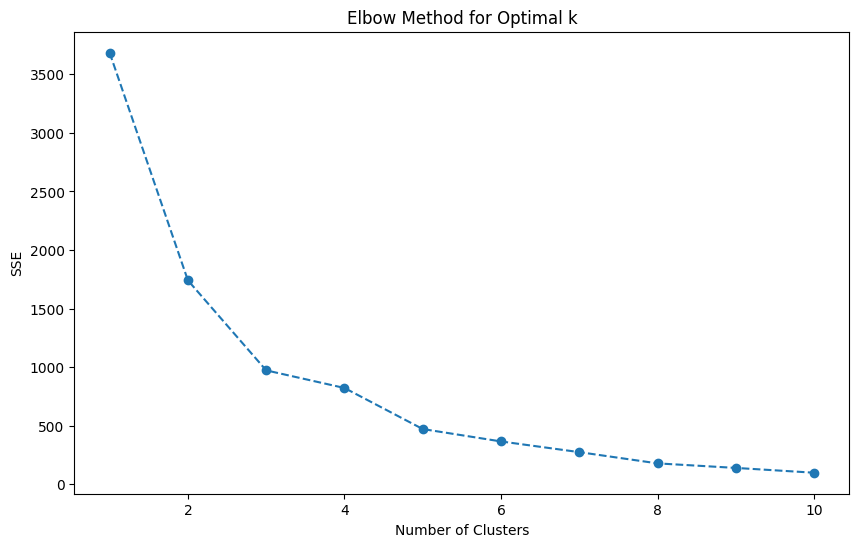

In [22]:
product_sales = onlineRetail.groupby('StockCode').agg({'TotalSales': 'sum'}).reset_index()

# Extract features for seasonality
product_sales['Month'] = onlineRetail['InvoiceDate'].dt.month
product_sales['DayOfWeek'] = onlineRetail['InvoiceDate'].dt.dayofweek
product_sales['Hour'] = onlineRetail['InvoiceDate'].dt.hour

# Clustering based on total sales
X = product_sales[['TotalSales']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use Elbow method to find optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.show()


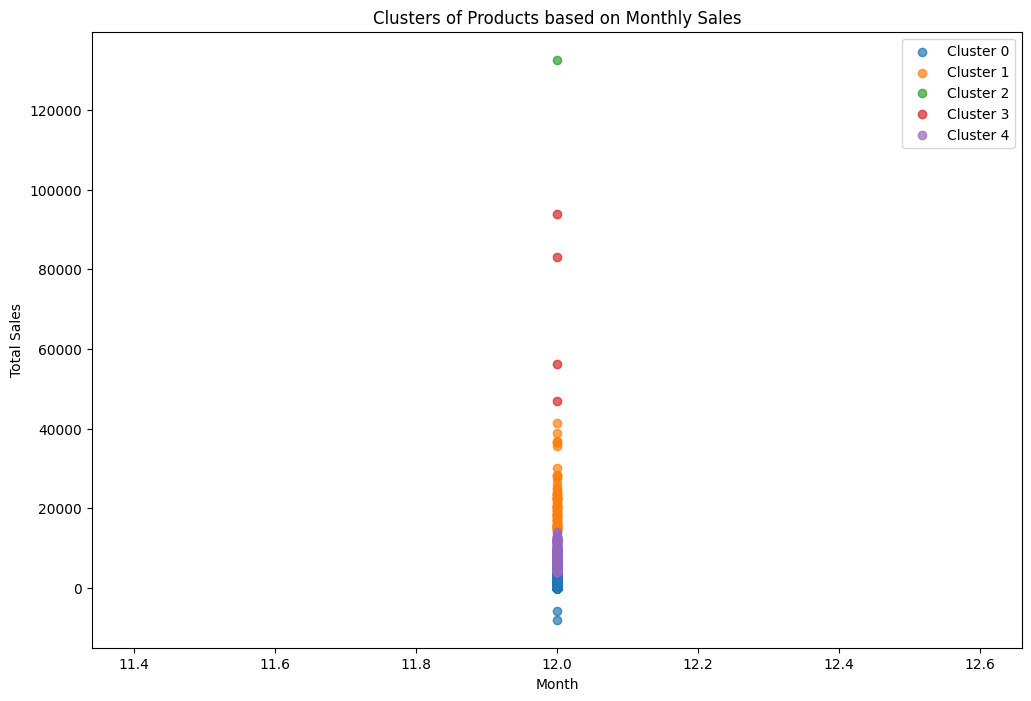


Popular Products:
Cluster 0: StockCode 23340 - Total Sales $3879.45
Cluster 1: StockCode 22086 - Total Sales $41423.78
Cluster 2: StockCode 22423 - Total Sales $132567.70
Cluster 3: StockCode 85123A - Total Sales $93923.15
Cluster 4: StockCode 22993 - Total Sales $14066.42


In [23]:

# From the Elbow method, let's choose k=3
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
product_sales['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
for cluster in range(k):
    cluster_data = product_sales[product_sales['Cluster'] == cluster]
    plt.scatter(cluster_data['Month'], cluster_data['TotalSales'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Clusters of Products based on Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Identify popular products in each cluster
popular_products = []
for cluster in range(k):
    cluster_data = product_sales[product_sales['Cluster'] == cluster]
    popular_product = cluster_data.loc[cluster_data['TotalSales'].idxmax()]
    popular_products.append(popular_product)

# Display popular products
print("\nPopular Products:")
for idx, product in enumerate(popular_products):
    print(f"Cluster {idx}: StockCode {product['StockCode']} - Total Sales ${product['TotalSales']:.2f}")

 ## analysis for the most popular product in each cluster.

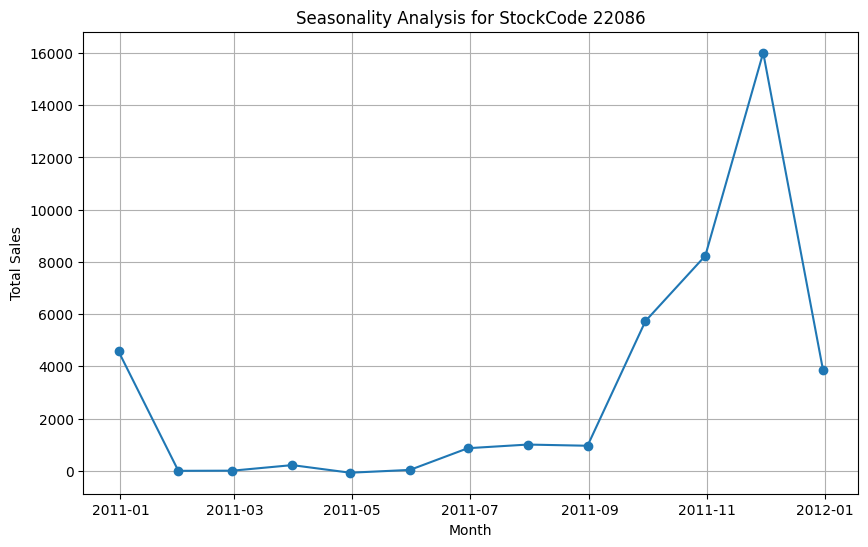

In [24]:
cluster0_popular_product = popular_products[1]
cluster0_sales = onlineRetail[onlineRetail['StockCode'] == cluster0_popular_product['StockCode']]
monthly_sales = cluster0_sales.resample('ME', on='InvoiceDate')['TotalSales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality Analysis for StockCode {cluster0_popular_product["StockCode"]}')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

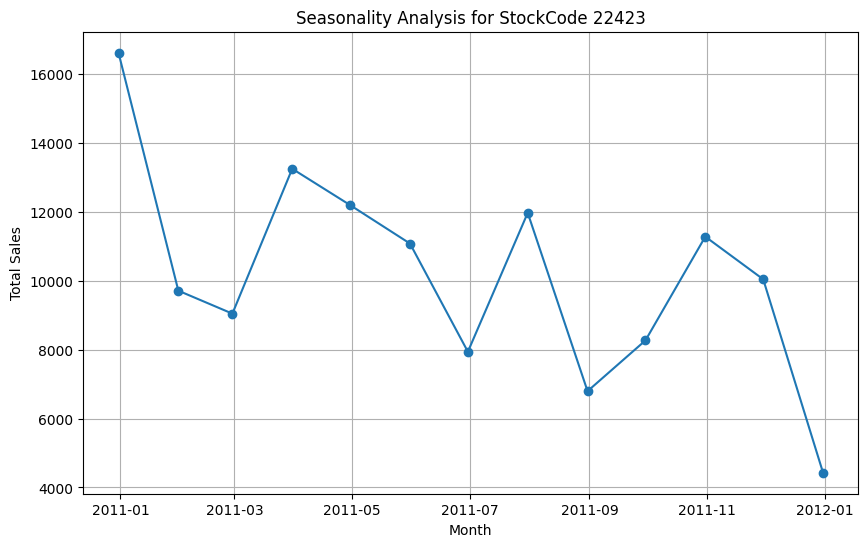

In [25]:
cluster1_popular_product = popular_products[2]
cluster1_sales = onlineRetail[onlineRetail['StockCode'] == cluster1_popular_product['StockCode']]
monthly_sales = cluster1_sales.resample('ME', on='InvoiceDate')['TotalSales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality Analysis for StockCode {cluster1_popular_product["StockCode"]}')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

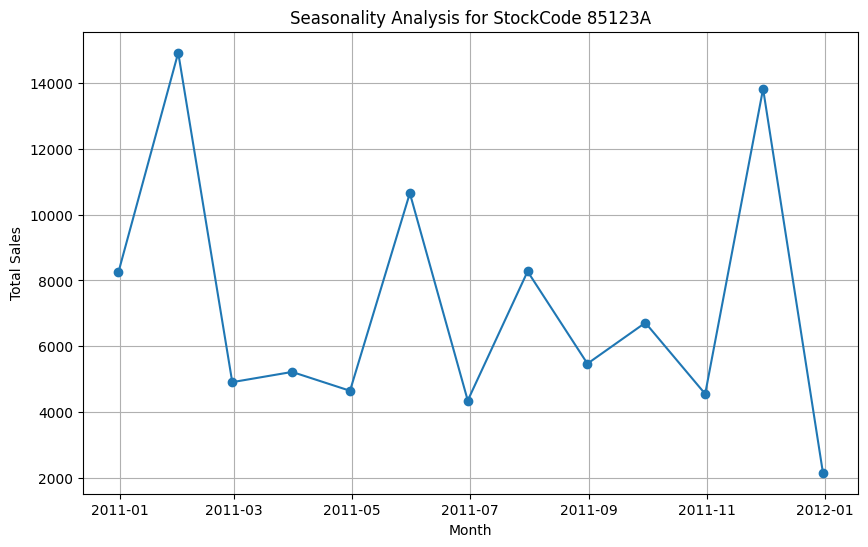

In [26]:
cluster2_popular_product = popular_products[3]
cluster2_sales = onlineRetail[onlineRetail['StockCode'] == cluster2_popular_product['StockCode']]
monthly_sales = cluster2_sales.resample('ME', on='InvoiceDate')['TotalSales'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title(f'Seasonality Analysis for StockCode {cluster2_popular_product["StockCode"]}')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

## 4. Forecasting Future Sales:

C:\Users\salem\AppData\Local\Temp\ipykernel_298772\1386960092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])
C:\Users\salem\AppData\Local\Temp\ipykernel_298772\1386960092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlineRetail['TotalSales'] = onlineRetail['Quantity'] * onlineRetail['UnitPrice']
C:\Users\salem\AppData\Local\Temp\ipykernel_298772\1386960092.py:10: FutureWarning: 'M' is deprecated and will be removed in a f

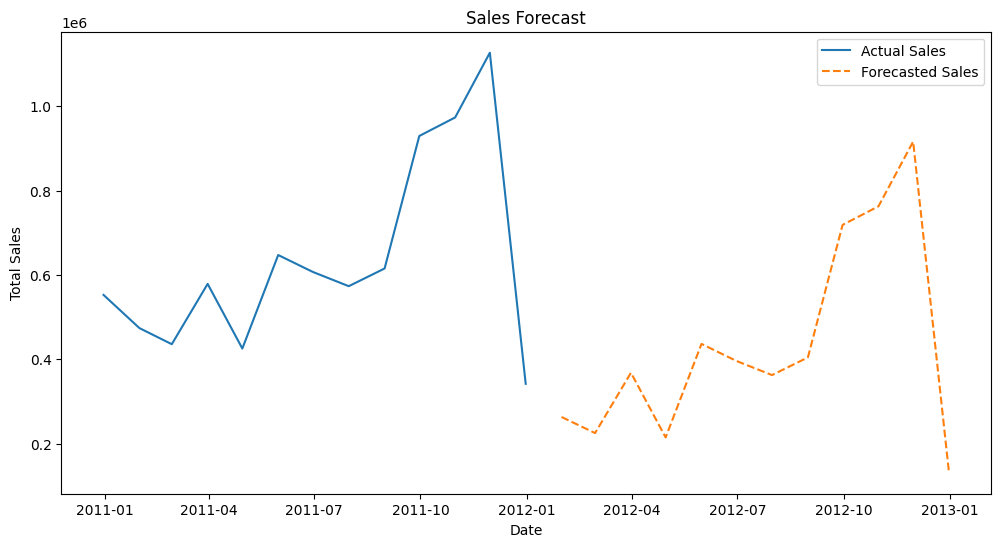

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

onlineRetail['InvoiceDate'] = pd.to_datetime(onlineRetail['InvoiceDate'])
onlineRetail.set_index('InvoiceDate', inplace=True)

# Calculate 'TotalSales'
onlineRetail['TotalSales'] = onlineRetail['Quantity'] * onlineRetail['UnitPrice']

# Resample the total sales data monthly
total_sales = onlineRetail['TotalSales'].resample('M').sum()

# Fit the SARIMA model
model = SARIMAX(total_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# Forecast the next 12 months
forecast_steps = 12
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=total_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean

# Plot the observed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(total_sales, label='Actual Sales')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Forecast')
plt.legend()
plt.show()

## 5.Geographical Analysis:

C:\Users\salem\AppData\Local\Temp\ipykernel_298772\3699936405.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  country_sales = onlineRetail.groupby('Country')['TotalSales'].resample('M').sum().unstack().T


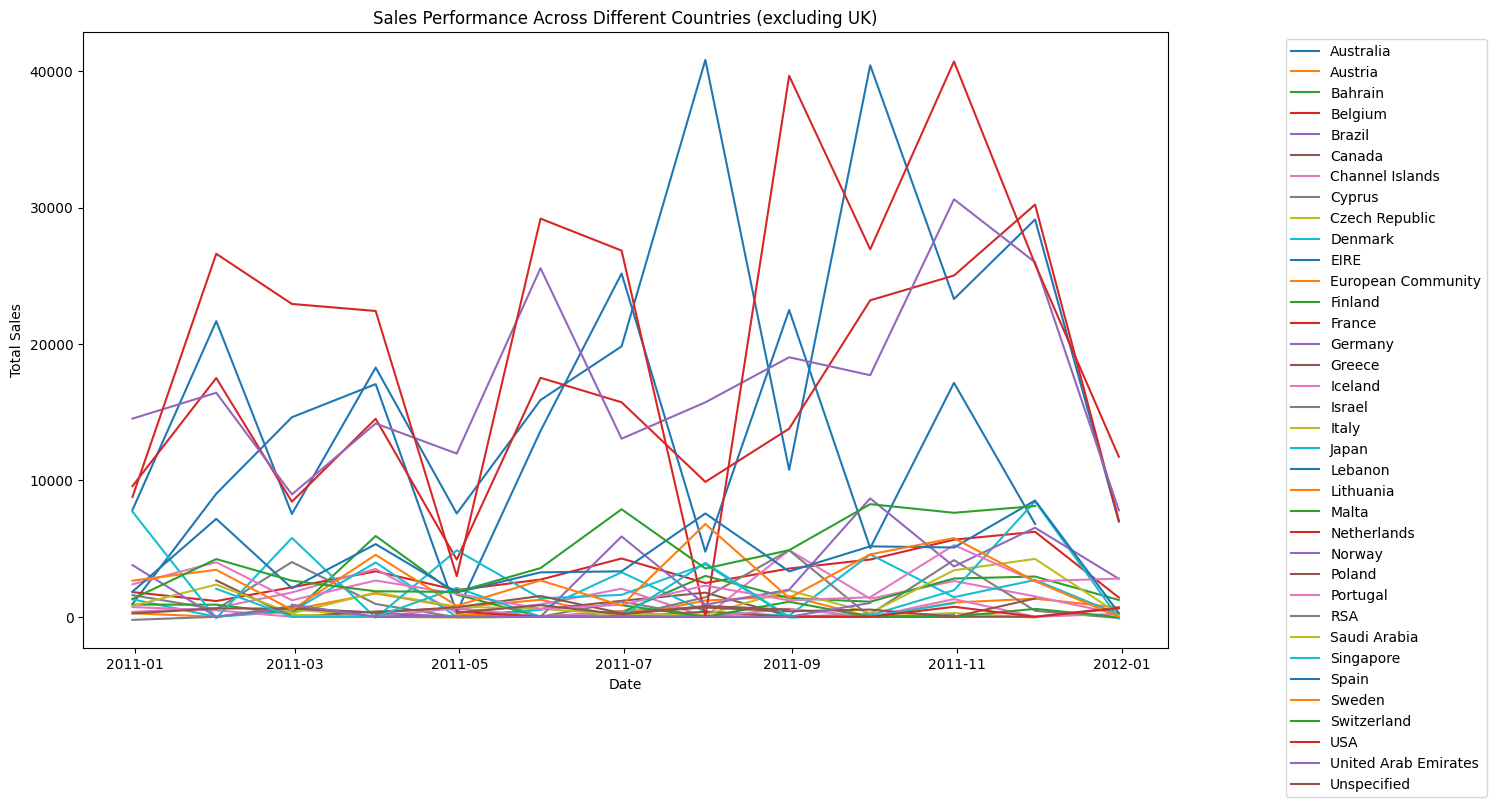

In [28]:

# Assuming 'onlineRetail' DataFrame is already loaded and 'TotalSales' column exists

# Group the sales data by country and resample monthly total sales
country_sales = onlineRetail.groupby('Country')['TotalSales'].resample('M').sum().unstack().T

# Plot the sales performance across different countries except UK
plt.figure(figsize=(14, 8))
for country in country_sales.columns:
    if country != 'United Kingdom':
        plt.plot(country_sales.index, country_sales[country], label=country)

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Performance Across Different Countries (excluding UK)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


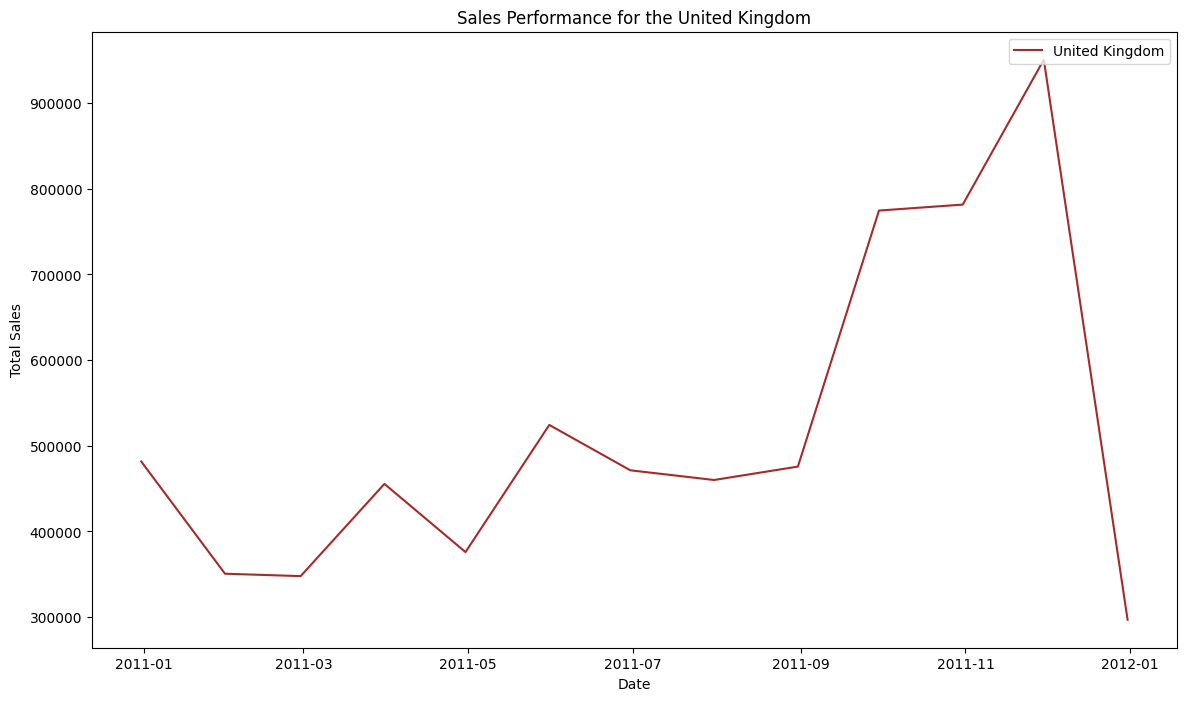

In [30]:
# Plot the sales performance for the UK only
plt.figure(figsize=(14, 8))
plt.plot(country_sales.index, country_sales['United Kingdom'], label='United Kingdom', color='brown')

plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales Performance for the United Kingdom')
plt.legend(loc='upper right')
plt.show()
